<a href="https://colab.research.google.com/github/seshu-damarla/Extreme-Learning-Machine/blob/main/Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
 [  0.   0. 125.]
 [  0.   0. 126.]
 [  0.   0. 127.]
 [  0.   0. 128.]
 [  0.   0. 129.]
 [  0.   0. 130.]
 [  0.   0. 131.]
 [  0.   0. 132.]
 [  0.   0. 133.]
 [  0.   0. 134.]
 [  0. 135.   0.]
 [  0.   0. 136.]
 [  0.   0. 137.]
 [  0.   0. 138.]
 [  0.   0. 139.]
 [  0.   0. 140.]
 [  0.   0. 141.]
 [  0.   0. 142.]
 [  0. 143.   0.]
 [  0.   0. 144.]
 [  0.   0. 145.]
 [  0.   0. 146.]
 [  0. 147.   0.]
 [  0.   0. 148.]
 [  0.   0. 149.]
 [  0.   0. 150.]]
0
[ 3.  4.  7.  9. 12. 14. 23. 30. 39. 43. 48.]
b11 is not empty
[ 2.  3.  6.  8. 11. 13. 22. 29. 38. 42. 47.]
[ 2  3  6  8 11 13 22 29 38 42 47]
dummy centroids new
[4.55454545 3.2        1.35454545 0.2       ]
old centroids
[4.7 3.2 1.3 0.2]
0.15534552264213694
1
[  2.  10.  13.  26.  31.  35.  36.  42.  46.  54.  56.  58.  60.  61.
  63.  65.  67.  68.  69.  70.  72.  73.  74.  80.  81.  82.  83.  84.
  85.  88.  89.  90.  91.  93.  94.  95.  97.  99. 100. 102. 107. 109.
 

Text(0, 0.5, 'sum of squared error between current and old centroids')

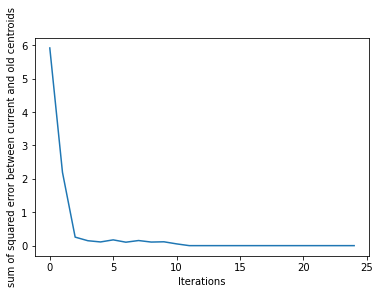

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Iris flower data set (there are three groups in the data)
data = pd.read_csv('data_kmeans.csv', header=None)
Data = np.array(data)
m = Data.shape[0]
xData = Data[:,0:4]
labels = Data[:,4]

K = 3 # no. of clusters
seed = 0

# randomly selecting K input samples as K cluster centers
np.random.seed(seed)
permut=list(np.random.permutation(K))
centroid_clusters_old = xData[permut,:]

#centroid_clusters_old = np.random.rand(K,xData.shape[1])

print('Initial centroids')
print(centroid_clusters_old)

MaxItr = 25
#print(new_centroid_clusters.shape)
perf =[]
for ik in range(MaxItr):
  print(f'Iteration = {ik}.')
  new_centroid_clusters = np.zeros((m,K))
  dummy_centroids_new = np.zeros((centroid_clusters_old.shape))
  sum1 = 0
  for i in range(m):
      #print(i)
      dist = np.zeros((1,K))
      for j in range(K):
          #print(j)
          #print(xData[i,:])
          dist[:,j] = np.linalg.norm(xData[i,:]-centroid_clusters_old[j,:])
          #print(dist)
      aa = np.argmin(dist, axis=1)
      #if i==0:
      new_centroid_clusters[i,aa]= i+1
      #elif i>0:
         #new_centroid_clusters[i,aa]= i
  print('New cluster indices')
  print(new_centroid_clusters)
  for ij in range(K):
      print(ij)
      b10 = new_centroid_clusters[:,ij]>0
      b11 = (new_centroid_clusters[b10,ij])
      print(b11)
      if len(b11)>0:
         print('b11 is not empty')
         if b11[0]==1:
            b11[0] = 0
         elif b11[0]>1:
            b11[0] = b11[0]-1

         b11[1:] = (b11[1:]-1)
         print(b11)
         b11 = np.int_(b11)
         print(b11)
         dataxc = xData[b11,:]
         dummy_centroids_new[ij,:] = np.mean(dataxc, axis=0, keepdims=True)
      elif len(b11)==0:
          dummy_centroids_new[ij,:] = np.zeros((1,centroid_clusters_old.shape[1]))
      
      print('dummy centroids new')
      print(dummy_centroids_new[ij,:])
      print('old centroids')
      print(centroid_clusters_old[ij,:])
      sum1  = sum1 + np.linalg.norm(dummy_centroids_new[ij,:]-centroid_clusters_old[ij,:])
      print(sum1)
      centroid_clusters_old[ij,:] = dummy_centroids_new[ij,:]
  perf.append(sum1)


print(perf)
plt.plot(perf)
plt.xlabel('Iterations')
plt.ylabel('sum of squared error between current and old centroids')





